# Importing Relevant Python Libraries

In [ ]:
#Imported pandas library because it contains a built in function called read_csv() which loads the dataset into a dataframe
#For loading data
import pandas as pd

#For analyzing data
import numpy as np

#For visualizing data
import seaborn as sns
import matplotlib.pyplot as plt

!pip install pandas==0.25.3
!pip install numpy==1.17.4
!pip install seaborn==0.9.0
print('Pandas Version Downloaded/Imported for Usage in this Notebook: V {}'.format(pd.__version__))
print('Numpy Version Downloaded/Imported for Usage in this Notebook: V {}'.format(np.__version__))
print('Seaborn Version Downloaded/Imported for Usage in this Notebook: V {}'.format(sns.__version__))

Pandas Version Downloaded/Imported for Usage in this Notebook: V 1.1.4
Numpy Version Downloaded/Imported for Usage in this Notebook: V 1.18.5
Seaborn Version Downloaded/Imported for Usage in this Notebook: V 0.11.0


#Changing the current working directory to point to the google drive stored project folder

In [ ]:
#--------------------- Google Colab Code ------------------------------------
#Mounted the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
import os
#specifying the file path to the gdrive folder containing this colab notebook & the raw data 
os.chdir('/content/drive/My Drive/SEIS_764_Group_Project/TL')

In [ ]:
os.getcwd() # finding the current working directory

'/content/drive/.shortcut-targets-by-id/1Fz_TNyhsvVwZFl4QgDlrt_ileWYOq-P_/SEIS_764_Group_Project/BigCat/TL'

In [ ]:
!ls -la #viewing the content of the current working directory

total 2529477
-rw------- 1 root root     345394 Dec  1 00:58 '764 Proposal.docx'
-rw------- 1 root root    5064044 Dec  4 16:20  AI_Project_Presentation.docx
-rw------- 1 root root   22022648 Dec  3 05:23 'AI_Project Presentation.pptx'
-rw------- 1 root root 1167033976 Dec  2 02:37  Moen_tl_model.h5
drwx------ 2 root root       4096 Nov 29 19:45  RawData
-rw------- 1 root root 1302857304 Dec  5 00:31  ResNet50_tl_model.h5
-rw------- 1 root root       5301 Dec  4 05:15  scratch_cnn_v3.ipynb
-rw------- 1 root root      42703 Dec  1 01:11  SerengetiStats.xlsx
-rw------- 1 root root     318873 Dec  4 01:27  TL_Model_Functional_Train.ipynb
-rw------- 1 root root     310588 Dec  3 04:37  TL_Model.ipynb
-rw------- 1 root root     289756 Dec  4 01:27  TL_Model_Keras_Train.ipynb
-rw------- 1 root root      96293 Dec  5 01:59  TL_Model_Sequential_Test.ipynb
-rw------- 1 root root      82147 Dec  5 02:24  TL_Model_Sequential_Train.ipynb
-rw------- 1 root root   91370080 Dec  5 02:24  trained_tl_m

#Loading the test data (Stored in the project folder on google drive)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generatedData = ImageDataGenerator(rescale = 1.0/255.0)
#-------------TEST DATA IS NOT USED FOR TRAINING SO IT IS UNSEEN DATA BY THE TRAINED-SEQUENTUAL-TL-MODEL
#populating the training_set by getting images from Raw Data >train
test_set = generatedData.flow_from_directory('/content/drive/My Drive/SEIS_764_Group_Project/BigCat/RawData/test',
                                                 batch_size = 75,
                                                 seed=1,
                                                 target_size=(361,512), #target_size=input image size
                                                 shuffle=True, #images are fed to the model in a different order every epoch
                                                 class_mode = 'categorical')

Found 717 images belonging to 5 classes.


# Retrieve the saved trained tl model

In [ ]:
#Loading back the saved trained tl model
#-->Loading the model back prevents keras models weights from resetting everytime you rerun the notebook

from keras import models    
reconstructed_TL_CNN_Model= models.load_model('/content/drive/My Drive/SEIS_764_Group_Project/BigCat/trained_tl_model.h5')

In [ ]:
reconstructed_TL_CNN_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 11, 16, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 90112)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90112)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2703390   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 17,418,233
Trainable params: 2,703,545
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
class_labels = []

for key in test_set.class_indices:
    class_labels.append(key)

print("class_labels: {}".format(class_labels)) #class_labels = ['elephant_clean', 'impala_clean', 'zebra_clean']

class_labels: ['cheetah', 'elephant', 'impala', 'lion', 'zebra']


# Making Model Predictions (After Training & Validating the Model)

In [ ]:
#-----------------------RUN FROM HERE------------------------------------------------------------------------------------------------
X_test_batch,y_test_batch= next(test_set)

#print("\n---------------------Displaying y_pred_vector based on the 1st batch of X_test_batch & y_actual_vector based on the 1st batch of y_test_batch----------------------------")
y_pred_matrix=reconstructed_TL_CNN_Model.predict(X_test_batch)
y_pred_vector=np.argmax(y_pred_matrix, axis = -1) #print(y_pred_vector)   #print(y_pred_vector.shape)

y_actual_matrix=y_test_batch
y_actual_vector=np.argmax(y_actual_matrix, axis=-1)

#print("\n---------------------Initialization of the accumulated_y_pred_vector ----------------------------")
accumulated_y_pred_vector=y_pred_vector[:] #copying the y_pred_vector into a new array #print(accumulated_y_pred_vector)       #print(accumulated_y_pred_vector.shape)
accumulated_y_actual_vector=y_actual_vector[:]

#converting an array into a list
accumulated_y_pred_list=accumulated_y_pred_vector.tolist()  #print(accumulated_y_pred_list)    #print(len(accumulated_y_pred_list))

accumulated_y_actual_list=accumulated_y_actual_vector.tolist() 

import math    

batchesProcessed =0
for X_test_batch,y_test_batch in test_set:
  y_pred_matrix=reconstructed_TL_CNN_Model.predict(X_test_batch) #matrix
  y_pred_vector=np.argmax(y_pred_matrix, axis = -1) # matrix is converted into a array
  y_pred_list=y_pred_vector.tolist() # vector is converted into a list

  y_actual_matrix=y_test_batch # matrix
  y_actual_vector=np.argmax(y_actual_matrix, axis=-1) # matrix is converted into a array
  y_actual_list=y_actual_vector.tolist() # vector is converted into a list

  #storing the list into another list (doesnt cause nesting of lists)
  for element in y_pred_list:
    accumulated_y_pred_list.append(element)

  #storing the list into another list (doesnt cause nesting of lists)
  for element in y_actual_list:
    accumulated_y_actual_list.append(element)

  print("\n---------------------Accumulating the y_pred_list----------------------------")
  print(accumulated_y_pred_list)

  print("\n---------------------Accumulating the y_actual_list----------------------------")
  print(accumulated_y_actual_list)

  batchesProcessed =batchesProcessed + 1
  print("Processed Batch#: ", batchesProcessed)
  #ceil is used because 517(val_set)/75(batch_size)=6.89 so the ceil of that gives us 6
  #since we already computed the first batch outside of the for loop to initialize the
  #accumulated_y_actual_list variable
  if(batchesProcessed ==math.ceil(len(test_set))-1):
    break

print("\n---------------------Finished Accumulation of the y_pred_list----------------------------")

print("\n---------------------Converting the accumulated_y_pred_list into the accumulated_y_pred_vector----------------------------")
accumulated_y_pred_vector=np.array(accumulated_y_pred_list)
print("accumulated_y_pred_vector: {}".format(accumulated_y_pred_vector))
print("accumulated_y_pred_vector: {}".format(accumulated_y_pred_vector.shape))

accumulated_y_actual_vector=np.array(accumulated_y_actual_list)
print("accumulated_y_actual_vector: {}".format(accumulated_y_actual_vector))
print("accumulated_y_actual_vector: {}".format(accumulated_y_actual_vector.shape))


---------------------Accumulating the y_pred_list----------------------------
[0, 0, 2, 1, 0, 1, 2, 1, 4, 1, 3, 2, 3, 2, 2, 2, 2, 1, 4, 3, 4, 4, 2, 2, 1, 1, 4, 2, 2, 1, 0, 0, 4, 2, 1, 2, 3, 2, 4, 2, 2, 3, 4, 3, 2, 4, 4, 3, 0, 3, 4, 2, 3, 1, 2, 2, 0, 0, 2, 4, 3, 3, 1, 2, 2, 4, 2, 4, 0, 2, 4, 4, 2, 0, 3, 3, 2, 2, 2, 4, 0, 1, 3, 4, 3, 0, 0, 3, 2, 4, 4, 0, 4, 1, 0, 3, 1, 0, 2, 1, 2, 4, 1, 1, 3, 3, 2, 0, 1, 1, 3, 4, 0, 2, 1, 1, 4, 1, 1, 3, 0, 3, 4, 4, 1, 4, 0, 3, 2, 1, 4, 3, 4, 1, 0, 2, 3, 0, 1, 2, 1, 2, 3, 0, 4, 3, 4, 4, 2, 1]

---------------------Accumulating the y_actual_list----------------------------
[0, 0, 2, 1, 0, 1, 2, 1, 4, 1, 3, 2, 3, 2, 2, 2, 1, 1, 4, 3, 0, 4, 2, 2, 1, 1, 4, 2, 2, 1, 0, 0, 4, 2, 1, 2, 3, 2, 4, 2, 2, 3, 4, 3, 2, 4, 4, 0, 0, 3, 4, 2, 3, 1, 1, 4, 0, 0, 2, 4, 3, 3, 1, 2, 2, 4, 2, 4, 0, 2, 4, 4, 2, 0, 3, 3, 2, 2, 2, 4, 0, 1, 2, 4, 3, 0, 0, 3, 2, 4, 4, 0, 4, 1, 0, 3, 1, 0, 2, 1, 2, 4, 1, 1, 3, 3, 2, 0, 1, 1, 0, 4, 0, 2, 1, 1, 4, 1, 1, 2, 0, 3, 4, 4, 1, 4, 0, 3, 4, 1

# Assessing the quality of the model predictions

Confusion Matrix: 
[[ 91   0   0   8   1]
 [  0 157  11   3   0]
 [  0   4 167   2   1]
 [  3   0   5  92   0]
 [  1   0  10   1 160]]
Confusion Matrix: [Heat Map]


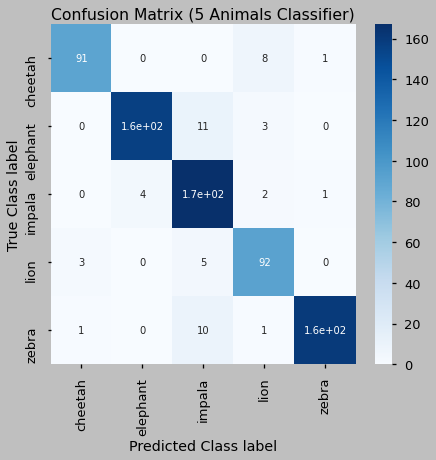

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(accumulated_y_actual_vector, accumulated_y_pred_vector) #1d data structures aka 1d-vectors
print("Confusion Matrix: \n{}".format(cm))

#For visualizing data
import matplotlib.pyplot as plt
import pandas as pd

cm_df = pd.DataFrame(cm ,
                     index =class_labels,  #1d data structures aka 1d-vectors
                     columns =class_labels) #1d data structures aka 1d-vectors

print("Confusion Matrix: [Heat Map]")
import seaborn as sns
plt.style.use(['seaborn-talk','grayscale'])
figure = plt.figure(figsize=(6, 6))
sns.heatmap(cm_df , annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix (5 Animals Classifier)')
plt.ylabel('True Class label')
plt.xlabel('Predicted Class label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
      
CReport=classification_report(accumulated_y_actual_vector, accumulated_y_pred_vector,target_names=class_labels) #1d data structures aka 1d-vectors
print('\n Classification Results:\n',CReport)


 Classification Results:
               precision    recall  f1-score   support

     cheetah       0.96      0.91      0.93       100
    elephant       0.98      0.92      0.95       171
      impala       0.87      0.96      0.91       174
        lion       0.87      0.92      0.89       100
       zebra       0.99      0.93      0.96       172

    accuracy                           0.93       717
   macro avg       0.93      0.93      0.93       717
weighted avg       0.93      0.93      0.93       717



In [ ]:
from keras.utils import to_categorical 
accumulated_y_actual_vector_OneHotEncoded=to_categorical(accumulated_y_actual_vector)
print("\naccumulated_y_actual_vector_OneHotEncoded: \n{}".format(accumulated_y_actual_vector_OneHotEncoded))
print("accumulated_y_actual_vector_OneHotEncoded: \n{}".format(accumulated_y_actual_vector_OneHotEncoded.shape))

accumulated_y_pred_vector_OneHotEncoded=to_categorical(accumulated_y_pred_vector)
print("\naccumulated_y_pred_vector_OneHotEncoded: \n{}".format(accumulated_y_pred_vector_OneHotEncoded))
print("accumulated_y_pred_vector_OneHotEncoded \n{}".format(accumulated_y_pred_vector_OneHotEncoded.shape))


accumulated_y_actual_vector_OneHotEncoded: 
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
accumulated_y_actual_vector_OneHotEncoded: 
(717, 5)

accumulated_y_pred_vector_OneHotEncoded: 
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
accumulated_y_pred_vector_OneHotEncoded 
(717, 5)


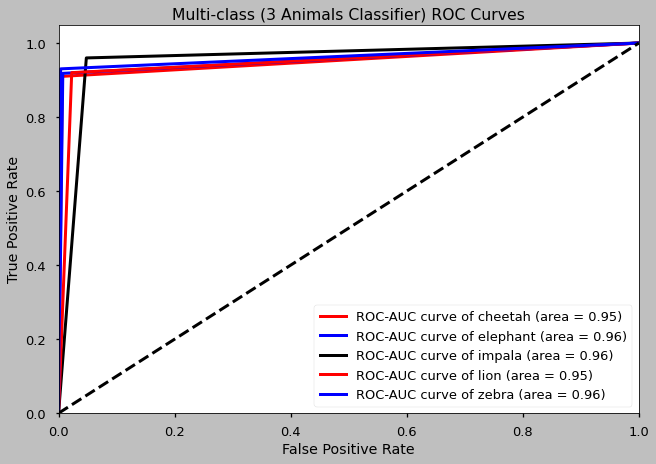

In [ ]:
#-------------------------------CONFUSION MATRIX FOR THE ENTIRE VAL DATA----------------------------#
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

#plot linewidth
lw=3

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_labels)): #1d data structures aka 1d-vectors
    fpr[i], tpr[i], _ = roc_curve(accumulated_y_actual_vector_OneHotEncoded[:,i],accumulated_y_pred_vector_OneHotEncoded[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.style.use('seaborn-talk')

colors = cycle(['red','blue','black'])

for i, color in zip(range(len(class_labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label="ROC-AUC curve of {0} (area = {1:0.2f})".format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class (3 Animals Classifier) ROC Curves')
plt.legend(loc="lower right")
plt.show()